## Installation

In [9]:
import sdv
from sdv.datasets.demo import download_demo

## Load data

In [10]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

In [11]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


## Metadata
The demo dataset is set up with metadata. Here is how you can set it up for your own data: https://docs.sdv.dev/sdv/reference/metadata-spec

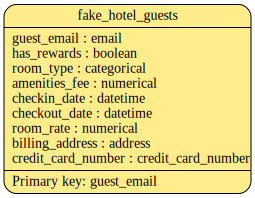

In [12]:
metadata.visualize()

## Create a Synthesizer
A synthesizer allows you to generate new data the looks like the training data but is fully anonymized. SDV includes multiple synthesizers. https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers. You can play around with the hyperparameters etc.

In [13]:
## Gaussian Copula
from sdv.single_table import GaussianCopulaSynthesizer

gc_synthesizer = GaussianCopulaSynthesizer(metadata)
gc_synthesizer.fit(data = real_data)

## Synthesize New Data
Once you have a synthesizer, you can create new data.

In [14]:
synthetic_data = gc_synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,2.34,26 Mar 2020,11 Apr 2020,119.53,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,False,DELUXE,NaN,02 Jul 2020,14 Sep 2020,174.70,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,False,BASIC,22.08,30 Mar 2020,17 Mar 2020,148.34,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788
3,humphreyjennifer@example.net,False,BASIC,8.18,03 May 2020,22 May 2020,177.51,"8906 Bobby Trail\nEast Sandra, NY 43986",3524946844839485
4,joshuabrown@example.net,False,SUITE,7.69,13 Jan 2020,10 Jan 2020,187.93,"732 Dennis Lane\nPort Nicholasstad, DE 49786",4446905799576890978


## Evaluating your data
You can run plenty of diagnostics on your synthetic data to ensure that it's structure matches the original data, check for anonymization and look at substantive similarity between the real an synthetic data.

In [15]:
from sdv.evaluation.single_table import run_diagnostic

### Structural Similarity
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |███████████████| 9/9 [00:00<00:00, 868.37it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████████| 1/1 [00:00<00:00, 229.79it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [16]:
#Statistical similarity between synthetic and real data
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |███████████████| 9/9 [00:00<00:00, 515.58it/s]|
Column Shapes Score: 89.11%

(2/2) Evaluating Column Pair Trends: |████████| 36/36 [00:00<00:00, 426.23it/s]|
Column Pair Trends Score: 88.3%

Overall Score (Average): 88.7%



In [20]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_names=['room_rate', 'room_type'],
    )
    
fig.show()

## Saving and Loading

In [19]:
gc_synthesizer.save('my_synthesizer.pkl')

gc_synthesizer = GaussianCopulaSynthesizer.load('my_synthesizer.pkl')

## Credit
Adapted from https://colab.research.google.com/drive/1F3WWduNjcX4oKck6XkjlwZ9zIsWlTGEM?usp=sharing#scrollTo=ZwdD7psYFOYL and other SDV tutorials found on https://docs.sdv.dev/sdv.